# Part 1

## 1.
**Assume each customer type is equally common. A customer walks into your store and purchases a product. What's the probability that this customer is of Type A, given that they purchased a product?**

    Set-up:

    Pr(purchase/Type A)=0.01

    Pr(purchase/type B)=0.1

    ________________________

    Pr(Type A)=Pr(Type B)=0.5

    Pr(purchase)=Pr(purchase/Type A)*Pr(Type A)+Pr(purchase/Type B)*Pr(Type B)

    =(0.01*0.5) + (0.1*0.5)
    =0.055

## 2.
**This is how the probability found in question 1 would change if more customers were of Type A:**
    

    Pr(Type A/purchase)=Pr(purchase/Type A)*Pr(Type A)/Pr(purchase)

    =(0.01*0.5)/0.055
    =0.091
    
    This is an increase to Pr(purchase). So the answer to the question would be:
    
    I. **Increase**

## 3.

In [281]:
def A_Prob(TypeA):
    #P(purchase/Type A)*P(Type A) + P(purchase/Type B)*P(Type B)
    
    TypeB = 1-TypeA
    
    TypeAProb = (0.01*TypeA) + (.1*TypeB)
    
    print(TypeAProb)

In [282]:
A_Prob(.5)

0.055


# Part 2

Data exploration idea I would like to pursue:

# How does health insurance type (attributes/cost) differ across states and over time?


I. My exploration idea is to see what sort of insurance plans cost most and if these vary across different regions of America and years. This interests me because there is a huge variety of health plans tailored to how healthy people are/if they have prior conditions, how concerned people are about preventative health. So I was curious about the different price points for each and how these may vary from year-to-year and state-to-state.

Answers to this would give insight into different demographic make-up of each state which would influence health insurance sellers' target groups. Health insurance types' consumption over time would give insight into how a certain plans may grow or lose popularity.


II. Scope of what data is required:
### Data tables to look at in order to answer this exploration idea:
    -BenefitsCostSharing
    -Rate
    
III. Methodology I want to pursue:
    a. Clean up the data (deal with any NaN's and Outliers)
    b. Present descriptive Statistics (location of data (mean/median), spread of data (how variable is it around mean/median)
    c. Present comparative data across time
    d. Visual map of US showing differing types of healthcare plans across states
    
IV. Outstanding concerns with analysis plan:
    a. Data is filled with a lot of NaN's
    b. Data input is not standardized. For example, to represent $0, it is represented as $0 or 0

In [283]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy import stats
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline

# 1. Exploring Health Plans Across Time and States

## a. Data Integrity/Clean Data

a. Need to inspect data and see if there are any NaN's that need to be taken out/replaced with 0's.
b. If there are outliers, take these out as well.

In [284]:
BenCosts = pd.read_csv("BenefitsCostSharing.csv")
BenCosts.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.



,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


## (b. Comparative Statistics)

In [285]:
BenCosts.describe()

,BusinessYear,IssuerId,IssuerId2,LimitQty,MinimumStay,RowNumber,VersionNum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


In [286]:
BenCosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 32 columns):
BenefitName            object
BusinessYear           int64
CoinsInnTier1          object
CoinsInnTier2          object
CoinsOutofNet          object
CopayInnTier1          object
CopayInnTier2          object
CopayOutofNet          object
EHBVarReason           object
Exclusions             object
Explanation            object
ImportDate             object
IsCovered              object
IsEHB                  object
IsExclFromInnMOOP      object
IsExclFromOonMOOP      object
IsStateMandate         object
IsSubjToDedTier1       object
IsSubjToDedTier2       object
IssuerId               int64
IssuerId2              int64
LimitQty               float64
LimitUnit              object
MinimumStay            float64
PlanId                 object
QuantLimitOnSvc        object
RowNumber              int64
SourceName             object
StandardComponentId    object
StateCode          

In [287]:
BenCosts.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

Due to huge amount of NaN's will not eliminate rows that contain them, but rather replace NaN's with 0's to not compromise data's wealth of information.

In [288]:
CleanBenCosts = BenCosts.fillna(0)

Check to see if NaN's are left.

In [289]:
CleanBenCosts.isnull().sum()

BenefitName            0
BusinessYear           0
CoinsInnTier1          0
CoinsInnTier2          0
CoinsOutofNet          0
CopayInnTier1          0
CopayInnTier2          0
CopayOutofNet          0
EHBVarReason           0
Exclusions             0
Explanation            0
ImportDate             0
IsCovered              0
IsEHB                  0
IsExclFromInnMOOP      0
IsExclFromOonMOOP      0
IsStateMandate         0
IsSubjToDedTier1       0
IsSubjToDedTier2       0
IssuerId               0
IssuerId2              0
LimitQty               0
LimitUnit              0
MinimumStay            0
PlanId                 0
QuantLimitOnSvc        0
RowNumber              0
SourceName             0
StandardComponentId    0
StateCode              0
StateCode2             0
VersionNum             0
dtype: int64

Now that data is clean, let us explore top benefit plans across states.

## c. Benefit Plans Across Time

In [290]:
CleanBenCosts[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                         
                   count unique                        top   freq
BusinessYear                                                     
2014             1164869    496  Basic Dental Care - Child  18719
2015             2079286    517        Orthodontia - Adult  31269
2016             1804253    429        Orthodontia - Adult  27389

For 2014: 1.2 million plans bought, close to 500 different ones with adult dental care toping the list at close to 19,000 bought.

For 2015: 2 million plans bought, over 500 different ones with adult orthodontic dental care toping the list with over 30,000 of these plans bought. 2015 was a huge revenue boost for health insurance companies/brokers.
    
For 2016: 1.8 million plans bought, around 430 different ones only and adult orthodontic dental care toping the list with close to 27,000 of these plans bought.    
    
Another cut of the data that we can do is naming the most popular benefit plans per state. This could give way to state demographics, which was not supplied in available dataset.

Now let us see what the top benefit plans are spread across states. We just need to substitute out BusinessYear with StateCode feature.

## d. Benefit Plans Across States

In [291]:
CleanBenCosts[["StateCode","BenefitName"]].groupby('StateCode').describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              41320     84        Basic Dental Care - Adult   720
AL              28417    115              Orthodontia - Child   653
AR              68064     93              Orthodontia - Adult  1077
AZ             221612    195     Dental Check-Up for Children  3345
DE              31370    110              Orthodontia - Child   602
FL             364742    194  Routine Dental Services (Adult)  5130
GA             196579    151        Basic Dental Care - Adult  2893
HI               6741     76        Major Dental Care - Child   110
IA             110221    104        Basic Dental Care - Child  1727
ID              27313     71              Orthodontia - Child   447
IL             320533    157              Orthodontia - Adult  4299
IN             148531    109              Orthodontia - Adult  2347
KS              64279     82                Accidental Dental  1087
LA              91816    125              Orthodontia - Child  1491
ME              61834     99        Basic Dental Care - Adult   975
MI             189225    205        Major Dental Care - Child  3248
MO              95152    127        Basic Dental Care - Child  1577
MS              46895    104        Basic Dental Care - Child   725
MT              58132     75        Basic Dental Care - Adult  1049
NC              94290     98  Routine Dental Services (Adult)  1537
ND              48269     77        Basic Dental Care - Adult   974
NE              66935     90     Dental Check-Up for Children  1238
NH              44305     98        Major Dental Care - Child   707
NJ              86107    100        Major Dental Care - Child  1357
NM              56669     78        Basic Dental Care - Adult   828
NV              62743    121  Routine Dental Services (Adult)   930
OH             331045    193        Basic Dental Care - Child  5092
OK             133639     83              Orthodontia - Child  2136
OR              93502    123              Orthodontia - Adult  1344
PA             260866    157  Routine Dental Services (Adult)  4208
SC             111907     85        Basic Dental Care - Adult  1817
SD              47730     79        Basic Dental Care - Adult   843
TN             138154    129  Routine Dental Services (Adult)  2073
TX             465164    180        Basic Dental Care - Child  6441
UT              98421    101  Routine Dental Services (Adult)  1527
VA             142236    145        Basic Dental Care - Child  2256
WI             512587    146     Dental Check-Up for Children  7135
WV              32638     77              Orthodontia - Child   625
WY              48425     92        Basic Dental Care - Child   807

So interesting! Dental care is at the top of each state accounted for. I would not have thought this since Dental Insurance is not an essential health benefit for those over 18 years old, but for children it is.

Now, let us look visually at how many benefit plans vary across states.

In [292]:
CleanBenCosts[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Distinct_State = CleanBenCosts.StateCode.unique()
Benefit = []

for state in Distinct_State:
    state_benefit =  len(CleanBenCosts[CleanBenCosts["StateCode"] == state])    
    Benefit.append(state_benefit)  

It is best to have bar counts in descending order from top to bottom in order to visualize where most plans are sold in the US. This would give suggestion to where to target marketing teams/where to target sales efforts.

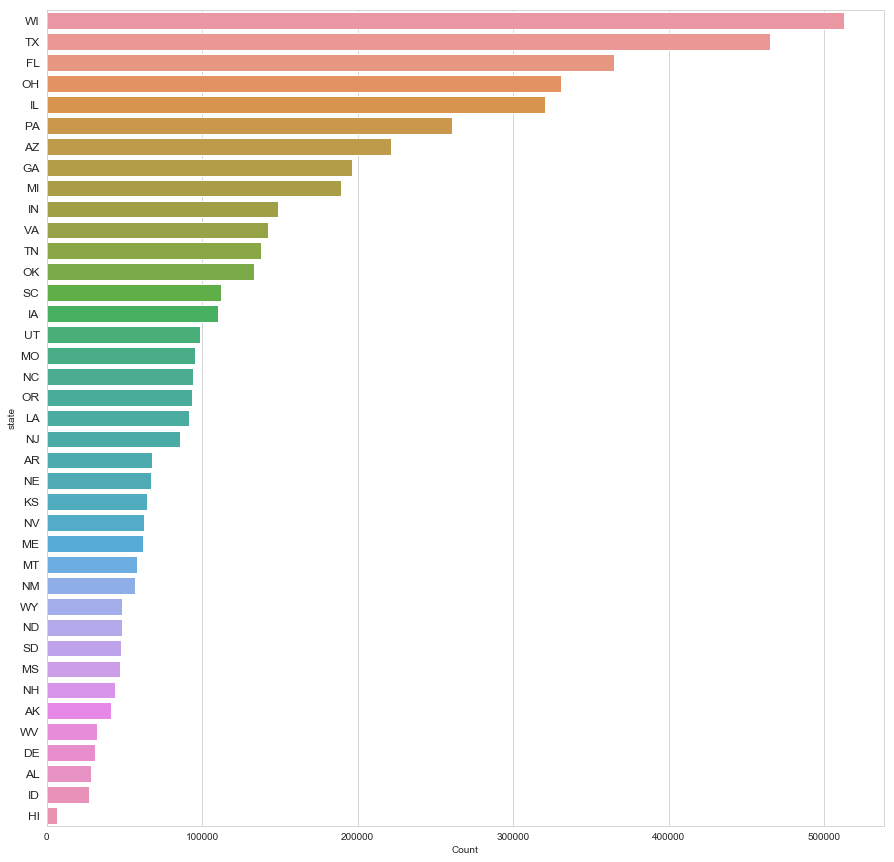

In [293]:
df = pd.DataFrame(
    {'state': Distinct_State,
     'Count' : Benefit
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.show()

Great! We can see from here that number of benefit plans across states only reach beyond 300,000 mark for WI, TX, FL, OH and IL. It is surprising that WI tops the list since TX is the second largest state in the US and FL is the state with the most old people.

To take this visualization further, we can look at benefit plans on a US map. Gradients of color represent volume of benefit plans per state. Moving cursor over a state will give you the exact number of benefit plans along with the two-letter state abbreviation.

In [294]:
data = dict(type = 'choropleth',
           locations = df['state'],
           locationmode = 'USA-states',
           colorscale = 'Cividis',
            text = df['state'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
           z = df['Count'],
           colorbar = {'title':'No of Benefit plans'})

layout = dict(title = '2014-2016 Benefit Plans by State (Hover for Breakdown)',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(255,255,255)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

With this map, can see that some states do not have data at all, such as CA, WA, CO, MN, KY, MD, NY and states left of NH. This is a data integrity issue since CA and NY are huge states right beside TX. A lot of data on the US as a whole is missing then. This data hole impacts analysis conclusions more so if there were final comments made in relation to US as a whole.

Some census data would help since the density of plans across states do not account for everyone in each state. Some data on how many people are in each state would help with seeing how many uninsured could be targeted for health insurance sales. Other Census data that would help would be to see what are health benefits cut across gender, socioeconmic status, etc.

# 2. Now, let us explore cost of healthcare costs across time and states.

We will now move forward to a different dataset called Rate. Here, we will see how different insurance for individuals who do not use tobacco and those who do vary across time and across states.  

In [295]:
Rate = pd.read_csv("Rate.csv")
Rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


Based on the data table above, there is opportunity to explore plans that were offered (no information regarding who bought these plans). We can look at year they were offered, states they offered in, how long these plans lasted, and numerous different rates per plan for different individuals and different type of family plans. However, we will focus on certain columns that will answer our exploration idea: BusinessYear, StateCode and relevant rate columns. 

## a. Data Integrity/Clean Data

Let us first take a look at how many NaN's there are and in the dataset and what is the data type (int/str) of each column.

In [296]:
Rate.BusinessYear.isnull().sum(), Rate.StateCode.isnull().sum(), Rate.IndividualRate.isnull().sum(), Rate.IndividualTobaccoRate.isnull().sum()

(0, 0, 0, 7762096)

In [297]:
Rate.Couple.isnull().sum()

12653504

In [298]:
Rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 24 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
SourceName                                   object
VersionNum                                   int64
ImportDate                                   object
IssuerId2                                    int64
FederalTIN                                   object
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
Pr

## (b. Comparative Statistics)

In [299]:
Rate.describe()

,BusinessYear,IssuerId,VersionNum,IssuerId2,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
count,1.269444e+07,1.269444e+07,1.269444e+07,1.269444e+07,1.269444e+07,4.932349e+06,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,1.269444e+07
mean,2.015034e+03,5.248592e+04,6.865558e+00,5.248592e+04,4.098026e+03,5.436911e+02,48.115714,49.835901,70.660012,89.405494,72.782793,89.012859,107.807774,6.348572e+03
std,7.940521e-01,2.641263e+04,3.857180e+00,2.641263e+04,6.122271e+04,2.945916e+02,30.422891,29.691985,44.620130,57.699279,48.232537,59.139094,73.241174,9.011435e+03
min,2.014000e+03,1.004600e+04,1.000000e+00,1.004600e+04,0.000000e+00,4.173000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+01
25%,2.014000e+03,3.021900e+04,4.000000e+00,3.021900e+04,2.933000e+01,3.391200e+02,26.710000,27.390000,27.910000,29.410000,28.260000,28.260000,29.490000,8.730000e+02
50%,2.015000e+03,4.953200e+04,6.000000e+00,4.953200e+04,2.916000e+02,4.632900e+02,49.770000,51.240000,74.680000,98.800000,77.250000,97.910000,116.710000,2.728000e+03
75%,2.016000e+03,7.652600e+04,9.000000e+00,7.652600e+04,4.789800e+02,6.843900e+02,69.900000,72.230000,107.670000,137.080000,110.430000,136.330000,167.960000,7.577000e+03
max,2.016000e+03,9.996900e+04,2.400000e+01,9.996900e+04,9.999990e+05,6.604610e+03,182.400000,169.650000,251.740000,357.940000,260.850000,339.310000,449.140000,6.349300e+04


In [300]:
#Couple Rate NaN's out of whole data set (over 12 million rows!)
12653504/12694445

0.9967748885437685

Given that group rate columns have around 99.6% missing data, will only compare different individual rates across time and states since there is sufficient data to work with in those columns.

### Cleaning Individual Tobacco Rate data column

In order to handle NaN's, the choices are to replace NaN's with 0's or to take out entire rows that have NaN's. Our first approach will be the former.

In [301]:
Rate.IndividualTobaccoRate = Rate.IndividualTobaccoRate.fillna(0)

Check to see if there are any more NaN's.

In [302]:
Rate.IndividualTobaccoRate.isnull().sum()

0

There are none. Great!

Now that the data is clean, let us take a look at individual costs with and without tobacco use summary statistics across time.

In [303]:
Rate[["BusinessYear","IndividualRate","IndividualTobaccoRate"]].groupby('BusinessYear').describe()

IndividualRate                                                   \
                      count          mean            std  min    25%     50%   
BusinessYear                                                                   
2014              3796388.0  12922.257001  111452.391035  0.0  32.11  296.43   
2015              4676092.0    329.161861     525.002167  0.0  28.43  283.38   
2016              4221965.0    337.539257     536.053504  0.0  28.49  296.30   

                                IndividualTobaccoRate                          \
                 75%        max                 count        mean         std   
BusinessYear                                                                    
2014          480.14  999999.00             3796388.0  240.926268  352.947647   
2015          469.69    9999.99             4676092.0  198.409085  304.982986   
2016          488.07    9999.00             4221965.0  198.780763  310.452054   

                                              
              min  25%  50%     75%      max  
BusinessYear                                  
2014          0.0  0.0  0.0  427.64  6604.61  
2015          0.0  0.0  0.0  367.77  2379.86  
2016          0.0  0.0  0.0  376.96  2677.79

There seems to be outliers in IndividualRate column since there is one value coming out at 999999.00. Also for IndividualToboccooRate 25% and 75% quartiles, 0's are what fill that portion of the dataset. Let us start dealing with these issues by eliminating outliers. Let us target our elimination areas by first looking at each individual rate's boxplots to see the distribution of data.

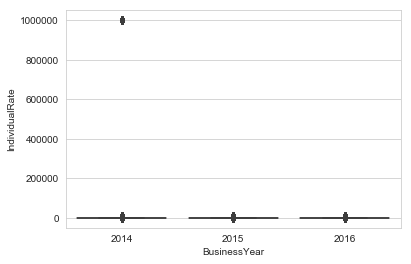

In [304]:
sns.boxplot(x="BusinessYear", y="IndividualRate", data=Rate)

This boxplot rendering is skewed because the data is that skewed. Outlier at 999999.00 is cause for the box to look like a line. All the data points are concentrated near the bottom because the gap between most of the points and the outlier is huge. The box plot will look different after outliers are removed so that data points will be closer to the Median. Another thing to note is that most outliers are in 2014 year for this column.

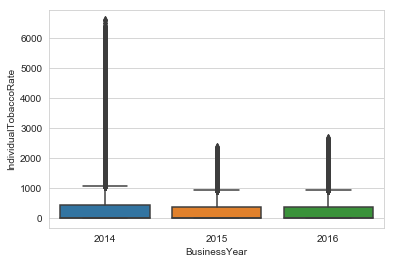

In [305]:
sns.boxplot(x="BusinessYear", y="IndividualTobaccoRate", data=Rate)

For Ind. Rate for tobacco users, year 2014 has a huge amount of outliers that need to be eliminated. It looks like 2014 has the biggest data integrity issues.

We will use zcore to drop outliers and perform it multiple times depending on how spread out data is. 

Zscore: In this procedure, z-score is calculated for each observation. Any z-score greater than +3 is considered to be an outlier. This rule of thumb is based on the empirical rule. From this rule we see that almost all of the data (99.7%) should be within three standard deviations from the mean. 

In [306]:
Rate2 = Rate[(np.abs(stats.zscore(Rate.drop([
 'BusinessYear',
 'StateCode',
 'IssuerId',
 'SourceName',
 'VersionNum',
 'ImportDate',
 'IssuerId2',
 'FederalTIN',
 'RateEffectiveDate',
 'RateExpirationDate',
 'PlanId',
 'RatingAreaId',
 'Tobacco',
 'Age',
 'Couple',
 'PrimarySubscriberAndOneDependent',
 'PrimarySubscriberAndTwoDependents',
 'PrimarySubscriberAndThreeOrMoreDependents',
 'CoupleAndOneDependent',
 'CoupleAndTwoDependents',
 'CoupleAndThreeOrMoreDependents',
 'RowNumber'], axis=1))) < 3).all(axis=1)]

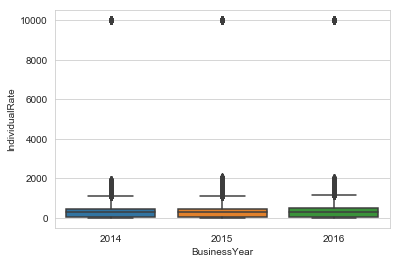

In [307]:
sns.boxplot(x="BusinessYear", y="IndividualRate", data=Rate2)

In [308]:
Rate2[["BusinessYear","IndividualRate"]].groupby('BusinessYear').describe()

IndividualRate                                              \
                      count        mean         std  min    25%     50%   
BusinessYear                                                              
2014              3674245.0  322.347511  487.618002  0.0  31.44  286.89   
2015              4625636.0  321.025899  521.744693  0.0  28.25  279.72   
2016              4174144.0  329.057729  532.930493  0.0  28.27  292.22   

                               
                 75%      max  
BusinessYear                   
2014          453.32  9999.99  
2015          460.69  9999.99  
2016          478.23  9999.00

Even after one elimination of values outside of +3 SD, there are still outliers. There are values at 9999.99. Another outlier elimination using z-score will be done to eliminate these values.

In [309]:
Rate3 = Rate2[(np.abs(stats.zscore(Rate2.drop([
 'BusinessYear',
 'StateCode',
 'IssuerId',
 'SourceName',
 'VersionNum',
 'ImportDate',
 'IssuerId2',
 'FederalTIN',
 'RateEffectiveDate',
 'RateExpirationDate',
 'PlanId',
 'RatingAreaId',
 'Tobacco',
 'Age',
 'Couple',
 'PrimarySubscriberAndOneDependent',
 'PrimarySubscriberAndTwoDependents',
 'PrimarySubscriberAndThreeOrMoreDependents',
 'CoupleAndOneDependent',
 'CoupleAndTwoDependents',
 'CoupleAndThreeOrMoreDependents',
 'RowNumber'], axis=1))) < 3).all(axis=1)]

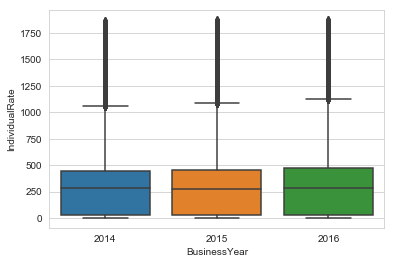

In [310]:
sns.boxplot(x="BusinessYear", y="IndividualRate", data=Rate3)

In [311]:
Rate3[["BusinessYear","IndividualRate"]].groupby('BusinessYear').describe()

IndividualRate                                              \
                      count        mean         std  min    25%     50%   
BusinessYear                                                              
2014              3626007.0  298.956321  263.935910  0.0  31.13  283.09   
2015              4571893.0  295.416474  281.852432  0.0  28.01  275.79   
2016              4122018.0  302.087733  288.024715  0.0  28.00  287.88   

                               
                 75%      max  
BusinessYear                   
2014          443.69  1867.91  
2015          451.56  1871.07  
2016          468.10  1870.62

Yes! The extreme values have been eliminated from IndividualRate column. They were most likely due to input error. Now moving onto IndividualTocabbocRate column. Let us check with boxplot to see how we can remedy 0 values at 25% and 75% quartiles. 

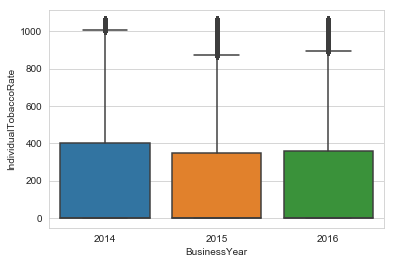

In [312]:
sns.boxplot(x="BusinessYear", y="IndividualTobaccoRate", data=Rate3)

Looks like it is. Now, let us verify with the summary statistics table that min, median, max, 25%, 50% and 75% values are not as spread out as it was in original dataset.

In [313]:
Rate3[["BusinessYear","IndividualRate","IndividualTobaccoRate"]].groupby('BusinessYear').describe()

IndividualRate                                              \
                      count        mean         std  min    25%     50%   
BusinessYear                                                              
2014              3626007.0  298.956321  263.935910  0.0  31.13  283.09   
2015              4571893.0  295.416474  281.852432  0.0  28.01  275.79   
2016              4122018.0  302.087733  288.024715  0.0  28.00  287.88   

                              IndividualTobaccoRate                          \
                 75%      max                 count        mean         std   
BusinessYear                                                                  
2014          443.69  1867.91             3626007.0  208.191792  281.530171   
2015          451.56  1871.07             4571893.0  177.253162  267.452153   
2016          468.10  1870.62             4122018.0  176.357773  271.709137   

                                              
              min  25%  50%     75%      max  
BusinessYear                                  
2014          0.0  0.0  0.0  403.10  1058.44  
2015          0.0  0.0  0.0  349.71  1058.44  
2016          0.0  0.0  0.0  357.74  1058.44

IndividualRate summary statistics looks good. However, IndividualTobaccoRate 25% and 75% values remain at 0. 

This must mean where 25% and 50% of the data fall, it must mostly be 0. Let us verify this with bar chart/line graph.

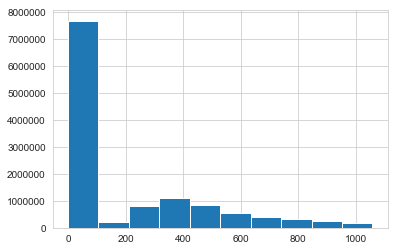

In [314]:
Rate3.IndividualTobaccoRate.hist()

This confirms it. Most of the values are 0, but not necessarily $0. This was due to all the NaN's (7762096/12694445 = .61) that were replaced with 0's. In order to just handle the actual rate data that was given, will create a smaller dataframe that includes original data minus NaN's. This will be done prior to visualization of IndividualTobaccoRate across across states.

## c. Individual Rates Across Time.

In [315]:
Rate3[["BusinessYear","IndividualRate"]].groupby('BusinessYear').describe()

IndividualRate                                              \
                      count        mean         std  min    25%     50%   
BusinessYear                                                              
2014              3626007.0  298.956321  263.935910  0.0  31.13  283.09   
2015              4571893.0  295.416474  281.852432  0.0  28.01  275.79   
2016              4122018.0  302.087733  288.024715  0.0  28.00  287.88   

                               
                 75%      max  
BusinessYear                   
2014          443.69  1867.91  
2015          451.56  1871.07  
2016          468.10  1870.62

We can see here that most Individual Rates were stable across three years. However, to see the breakdown of each Individual Rate, let us do a count of each price that was offered in 10 different ranges and sorted in descending order. 

In [316]:
Rate3['IndividualRate'].value_counts(bins=10)

(-1.8719999999999999, 187.107]    4934499
(187.107, 374.214]                3060551
(374.214, 561.321]                2270829
(561.321, 748.428]                1113097
(748.428, 935.535]                 527613
(935.535, 1122.642]                352648
(1122.642, 1309.749]                42136
(1309.749, 1496.856]                13223
(1496.856, 1683.963]                 4209
(1683.963, 1871.07]                  1113
Name: IndividualRate, dtype: int64

Therefore, for half of the dataset, most Individual Rate costs for non-tobacco users are 0 - 374 dollars from 2014 to 2016.

Now let us graph all IndividualRates per state to see if different rates are correlated with different states. Want to also see if there is variation in rates within each state. So this will be a two-dimensional assessment (across x-axis and across y-axis).

## d. Individual Rates Across States and Within each State using Boxplots

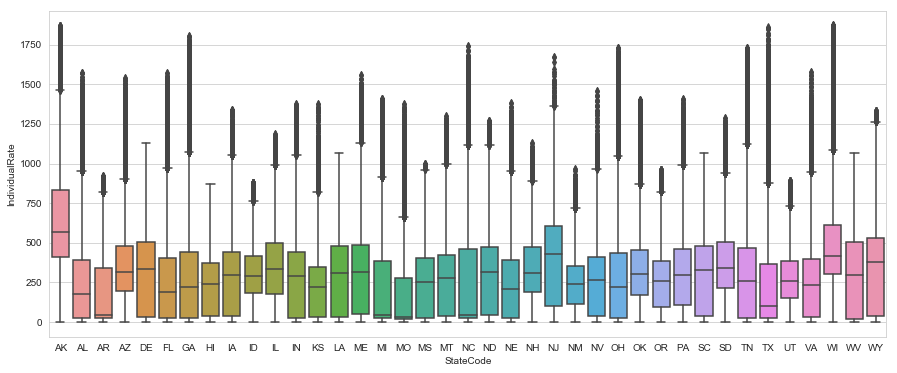

In [317]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=Rate3, order=Statelist)

From the above graph, we see that Arkansas has the most expensive rates whereas Montana has the cheapest based on where the median layed in each box plot. Regarding variability, Hawaii has the least variable whereas Texas has the most variable set of prices for Individual Rates. These differneces may be due to a state having mostly older people so variation is not high. With states that have greater variation with prices, this is most likely due to a state being big like Texas where age population is would be more diverse.

Now let us move onto Individual Tobacco Rates across time and states.

## a. More Data Integrity/Cleaning of Data

As mentioned before, will only work with data that has no NaN's (eliminated rather than changed to 0 value). In order to get the necessary data points, will make a smaller dataframe from original dataset, with relevant columns to make computations easier (only include Business Year, StateCode and IndividualTobaccoRate). 

In [318]:
#Need to reload dataset and make a copy of it.
Rate = pd.read_csv("Rate.csv")

In [319]:
Rate4 = Rate[['BusinessYear', 'StateCode', 'IndividualTobaccoRate']].copy()

In [320]:
Rate4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 3 columns):
BusinessYear             int64
StateCode                object
IndividualTobaccoRate    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 290.6+ MB


### Strategy for cleaning up IndividualTobaccoRate column: Reminder of how many NaN's, Remove NaN's, remove outliers.

In [321]:
Rate4['IndividualTobaccoRate'].isnull().sum()

7762096

In [322]:
a = str(round(((7762096/12694445)*100),2))

print('NaNs: ' + a + '%')

NaNs: 61.15%


This is a huge amount of data being eliminated. So there will possibly be a lot of time and state data lost as this huge chunk of data is eliminated from the whole dataset. At the same time, do not want to incorporate $0 amount as a valid price.

## (b. More Summary Statistics)

In [323]:
Rate4["IndividualTobaccoRate"].describe()

count    4.932349e+06
mean     5.436911e+02
std      2.945916e+02
min      4.173000e+01
25%      3.391200e+02
50%      4.632900e+02
75%      6.843900e+02
max      6.604610e+03
Name: IndividualTobaccoRate, dtype: float64

Confirmation: No 0's in original column. So all 0's from before were coming from NaN's being changed into 0's. Now, we will eliminate all NaN's to get data manipulations and visualizations on all available Ind. Tob. Rate data.

Eliminate all NaN's from Ind. Tob. Rate column.  

In [324]:
Rate5 = Rate4.dropna()

In [325]:
Rate5.isnull().sum()

BusinessYear             0
StateCode                0
IndividualTobaccoRate    0
dtype: int64

In [326]:
Rate5['IndividualTobaccoRate'].describe()

count    4.932349e+06
mean     5.436911e+02
std      2.945916e+02
min      4.173000e+01
25%      3.391200e+02
50%      4.632900e+02
75%      6.843900e+02
max      6.604610e+03
Name: IndividualTobaccoRate, dtype: float64

The dataset went from 12.7 million to 4.9 million. There is still a significant amount of data left to work with even though took out 60% of it. 

In [327]:
Rate5.head()

,BusinessYear,StateCode,IndividualTobaccoRate
14551,2014,AL,111.74
14552,2014,AL,193.59
14555,2014,AL,193.59
14556,2014,AL,193.59
14559,2014,AL,193.59


Now, let us clean the data by eliminating the outliers using z-score. Let us remind ourselves of the current data spread with boxplots and summary statistics.

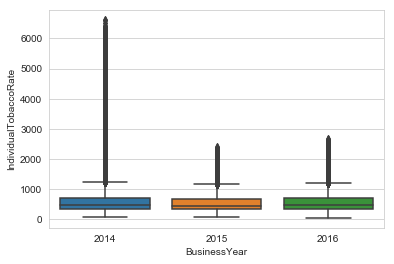

In [328]:
sns.boxplot(x="BusinessYear", y="IndividualTobaccoRate", data=Rate5)

In [329]:
Rate5[["BusinessYear","IndividualTobaccoRate"]].groupby('BusinessYear').describe()

IndividualTobaccoRate                                         \
                             count        mean         std    min     25%   
BusinessYear                                                                
2014                     1634426.0  559.615174  333.179319  55.66  341.30   
2015                     1765295.0  525.566058  272.844149  60.59  327.91   
2016                     1532628.0  547.585862  272.948212  41.73  349.65   

                                       
                 50%     75%      max  
BusinessYear                           
2014          475.65  694.80  6604.61  
2015          448.46  665.35  2379.86  
2016          467.72  693.99  2677.79

In [330]:
Rate6 = Rate5[(np.abs(stats.zscore(Rate5.drop([
 'BusinessYear',
 'StateCode'], axis=1))) < 3).all(axis=1)]

Let us boxplot in order to see Ind. Tob. Rate column's distribution around Median.

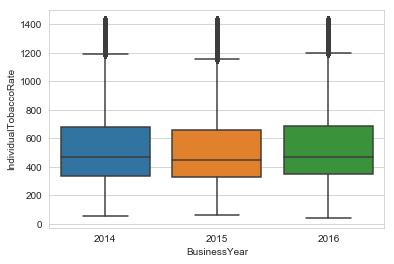

In [331]:
sns.boxplot(x="BusinessYear", y="IndividualTobaccoRate", data=Rate6)

Boxes from box plots have clear quartiles without extreme values as it looked like in year 2014 especially.

## c. Individual Tobacco Rates Across Time

In [332]:
Rate6[["BusinessYear","IndividualTobaccoRate"]].groupby('BusinessYear').describe()

IndividualTobaccoRate                                         \
                             count        mean         std    min     25%   
BusinessYear                                                                
2014                     1604806.0  535.234569  262.911830  55.66  339.07   
2015                     1753985.0  518.566027  259.013066  60.59  327.15   
2016                     1523000.0  540.774562  259.511634  41.73  348.95   

                                         
                 50%       75%      max  
BusinessYear                             
2014          469.90  678.4575  1427.41  
2015          446.67  658.9900  1427.45  
2016          465.98  687.6200  1427.27

On average, the most expensive Ind. Tob. Rates came from 2016 with 2014 not too far behind. In comparison with Ind. Rates without Tobacco use, these rates are not as stable over time and are more expensive.

## d. Individual Tobacco Rate Across States and Within each State using Boxplots

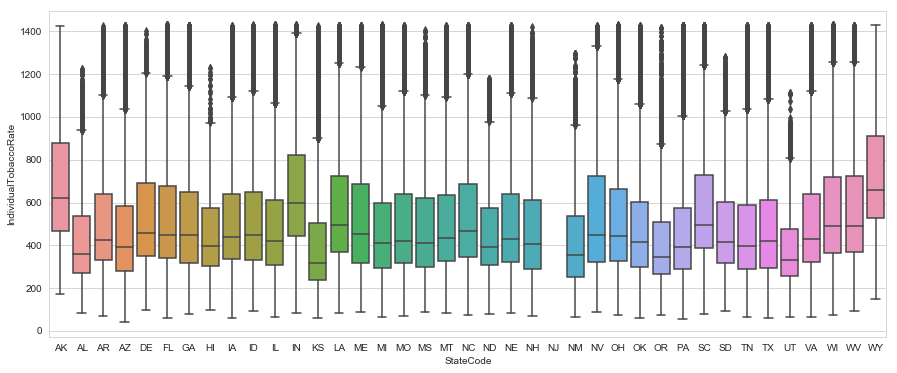

In [333]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualTobaccoRate", data=Rate6, order=Statelist)

In [334]:
print(str(len(Rate6.StateCode.unique())) + " states are listed, which is one off number of states used to analyze Ind. Rates.")

38 states are listed, which is one off number of states used to analyze Ind. Rates.


Now that we confirmed our data amount, will now comment on variability across states and variability within states.

There are different Ind Tobacco users' rates. The highest are from AK, IN and WY. The cheapest are in UT, NM, KS and AL. The most variable Ind Tobacco Rates witin a state are KS and OR. These rates compared to non-tobacco users are more expensive by approximately $240.

# Overall Lessons

Data integrity is key prior to working with such massive datasets as above. The huge amount of NaN's at times cautioned me from providing too general of summary statistics where the number of datapoints remaining did not provide enough solid representation of real life population data. At the same time, the dataset started at around 12 million and after the NaN's were taken out with Individual Tobacco Rate data, the amount of data remained massive. So general statements made from data still held weight. Also, huge gaps in data meant that multiple eliminations of data outside of z-score of +3 had to be done. This helped clear data of any anomalies that would affect general statements placed on data after analysis.

# Final Summary

Definitely, adoption of health plans vary across time and states. Number of plan carriers increased from 2014 to 2015 and then dropped slightly in 2016. Individual Rate plans for non-tobacco users were stable across time. On the other hand, Individual Rate plans for tobacco users decreased from 2014 to 2015 and increased again in 2016. And comparing pricing points between non-tobacco users and tobacco users, Individual Rates for tobacco users were more expensive as expected. Those that have higher health risks are paying for higher premiums. 

Given the wealth of data and having it span across multiple states, there is much more to be discovered especially in regards to gaps in state data and group rate data.

# Next Steps

If there was more resources and time, I would definitely evolve my data analysis by going into: 
    1. What sort of health insurance do people buy if they are heading into maturnity leave?
    2. What sort of health insurance is bought when payers are under Medicare (>65 years old)?
    3. Are there more purchases in a certain socioeconomic cut of America?
    5. When are most purchases besides during open enrollment in November?
    6. Who usually buys HMO/PPO?
    7. How much of the US buys individual plans versus group plans?
    8. Are there plans that are exclusive to states?